# Background

A supervised machine learning approach called k-Nearest Neighbors (KNN) can be applied 
to classification or regression problems. The approach does not make any assumptions about the underlying distributions of the data since KNN is non-parametric. As opposed to a parametric methodology like linear regression, which calls for us to identify a function that captures the connection between the dependent and independent variables, our method does not need th is. KNN has the benefit of being simple to comprehend. A query point (or test point) is categorized using the k labeled training points that are closest to it when utilized for classification.


# Imports

Few library needs to be imported, like pandas, numpy, matplotlib, and few of sklearn for 
dataset and split function.


In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#  Loading Dataset

In [2]:
iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Fig 1.1:First 5 data of iris dataset

This Iris dataset includes three iris species with 50 samples each as well as some properties 
about each flower. One flower species is linearly separable from the other two, but the other 
two are not linearly separable from each other.
The columns in this dataset are:

 o Id
 
 o SepalLengthCm
 
 o SepalWidthCm
 
 o PetalLengthCm
 
 o PetalWidthCm
 
 o Species

# Checking if the dataset is balanced or not

<AxesSubplot:ylabel='target'>

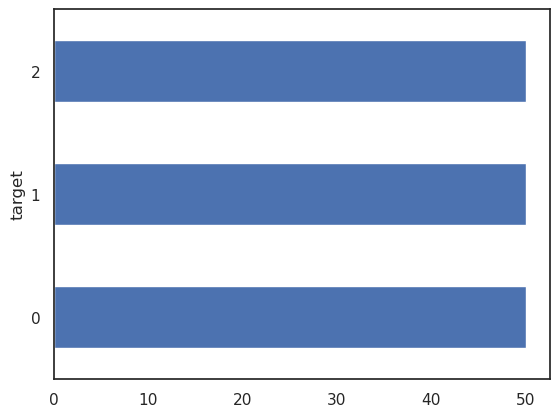

In [3]:
df.groupby('target').size().plot(kind='barh')

Fig 1.2: frequency of each target

Now from this graph we can see in this dataset three of the class have same amount of data. 
So, it’s balanced dataset.
Now we need a distance function. In KNN we find the distance between the test data with 
all our dataset. We can use eucledean or manhattan distance. Here a generalized function is 
used, with using a parameter p, when p = 1, it’s manhattan distance and when p = 2, it’s 
eulclidean distance. 



                             

# Euclidean distance function

In [4]:
def dis(a, b, p=1):
    l = len(a)
    d = 0
    for i in range(l):
        d += abs(a[i] - b[i]) ** p
    d = d ** (1/p)
    return d

Now one test point will be executed before splitting data for train and test, it’s to check all 
implementation, that have been so far. Here the test point that used is test_pt = [4.8, 2.7, 2.5, 
0.7]. Here after taking the test point the code will measure distance from this data point with 
all those 150 data points. Then it’ll convert that list to a python DataFrame for further 
convenience

In [5]:
X = df.drop('target', axis=1)
y = df.target
test_pt = [4.8, 2.7, 2.5, 0.7]
distances = []
for i in X.index:
    a = dis(test_pt, X.iloc[i])
    distances.append(a)
dists = pd.DataFrame(data=distances, index=X.index, columns=['dist'])
dists.head()

,dist
0,2.7
1,2.0
2,2.3
3,2.1
4,2.7


Fig 1.3: Distance DataFrame

# Distance DataFrame is sorted to measure which class the nearest

In [6]:
def knn_sort(k,dists): return dists.sort_values(by = 'dist')[:k]

# Value of k is determined. 
Here k is 5. And taking top k distance the majority of 
the class will be measure. Here a dictionary named count_set is used to keep track of the 
voting.

In [7]:
sorted_dists = knn_sort(5, dists)
print(sorted_dists)

count_set = {}
for i in sorted_dists.index:
    if y[i] not in count_set:
        count_set[y[i]] = 1
    else:
        count_set[y[i]] += 1

print(max(count_set))

    dist
98   1.4
57   1.5
93   1.7
24   1.8
30   1.8
1


Fig 1.4: Top k Distance and predicted class for test_pt


Now this code determined the accurate prediction for that data point and now all the data 
can be splitted for training and testing. Hrere two library function train_test_split and 
StandardScaler are used from sklearn for splitting and feature scalling.

# Split the data - 75% train, 25% test

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Training and predicting the test set and checking accuracy.

In [9]:
def KNN(X_train, X_test, y_train, y_test, k, p):
    y_predict = []
    for test_pt in X_test:
        distances = []
        for i in X_train:
            a = dis(test_pt, i, p)
            distances.append(a)
        dists = pd.DataFrame(data=distances, index=y_train.index, columns=['dist'])
        sorted_dists = knn_sort(k, dists)
        #print(sorted_dists)
        count_set = {}
        for i in sorted_dists.index:
            if y_train[i] not in count_set:
                count_set[y_train[i]] = 1
            else:
                count_set[y_train[i]] += 1
        y_predict.append(max(count_set))
    y = y_test.tolist()
    accr = 0
    for i in range(len(y)):
        if y[i] == y_predict[i]:
            accr += 1
    return accr/len(y)
    #print('Accuracy',accr/len(y))


# Calling the function

In [10]:
KNN(X_train, X_test, y_train, y_test, 5,1)

0.868421052631579

Fig 1.5: Accuracy when k = 5

Now the following code is to see how the model accuracy varies with respect to k value. A 
simple loop is used to call KNN few times, and the list is represented in a graph. And it 
also 

# State the best accuracy 

0.9736842105263158


Text(0, 0.5, 'Accuracy (%)')

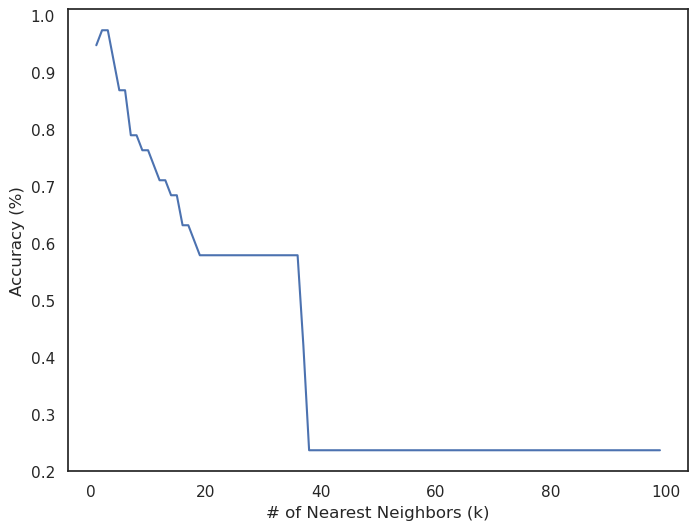

In [11]:
accuracies = []
for i in range(1,100):
    accuracies.append(KNN(X_train, X_test, y_train, y_test, i,1))

print(max(accuracies))

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(range(1,100), accuracies)
ax.set_xlabel('# of Nearest Neighbors (k)')
ax.set_ylabel('Accuracy (%)')


Fig 1.6: The best accuracy when k = 3

Fig 1.7: Exploring the effect of varying k

Here from the graph we can see after arriving the peak accuracy at k = 3, the model starts
performing poor gradually, and after k>20, the accuracy start to drop off.


# Ratio of the Train and Test samples:

There are 112 train data sample and 38 test data samples are being considered for this 
problem. So, the ratio would be –

Train data = 112*100/ (113+37) % = 75%

Test data = 38*100/(113+37)% = 25%

# Performance Analysis:


The code above implements the k-Nearest Neighbors algorithm to classify the iris dataset. 
Here is a summary of the performance analysis:
1. The code first loads the iris dataset and converts it into a pandas DataFrame. It then visualizes 
the distribution of samples across the three classes using a bar chart.
2. A custom function dis() is defined to calculate the distance between two data points. The 
function uses the Manhattan distance metric, which is specified using the p argument.
3. A test point is chosen and the distances between the test point and all other data points are 
calculated using the dis() function. The distances are stored in a pandas DataFrame.
4. A function knn_sort() is defined to sort the distances and return the k-nearest neighbors. 
The function is used to find the 5-nearest neighbors of the test point.
5. A dictionary count_set is used to count the number of samples from each class in the 5-
nearest neighbors. The class with the highest count is chosen as the predicted class for the 
test point.
6. The code then splits the iris dataset into a training set and a testing set, with 75% of the data 
used for training and 25% used for testing. The data is also standardized using the 
StandardScaler() function from scikit-learn.
7. The k-Nearest Neighbors algorithm is then applied to the testing set using a for loop. For 
each test point, the distances to all training points are calculated and the k-nearest neighbors 
are determined using the knn_sort() function. The class with the highest count is chosen as 
the predicted class.
8. The accuracy of the algorithm is then calculated by comparing the predicted classes to the 
true classes in the testing set.
9. A function KNN() is defined to allow for different values of k and p (distance metric) to be 
used. The function returns the accuracy of the algorithm.
10. The KNN() function is used to calculate the accuracy of the algorithm for different values 
of k and p. The results are plotted using matplotlib to show how the accuracy changes with 
k. Two plots are created, one for the Manhattan distance metric (p=1) and one for the 
Euclidean distance metric (p=2).
In summary, the code implements the k-Nearest Neighbors algorithm to classify the iris 
dataset and evaluates its performance using accuracy. The performance is analyzed by 
testing the algorithm for different values of k and p, and plotting the results.

# Data Visualization

This code is using the Pandas DataFrame plot() method to create a scatter plot of two variables in a DataFrame.

df.plot() is a method provided by the Pandas library that allows for quick visualization of data stored in a DataFrame. In this case, kind="scatter" specifies that we want to create a scatter plot, and x="sepal length (cm)" and y="sepal width (cm)" specify the names of the columns in the DataFrame that we want to plot on the x and y axes, respectively.

<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

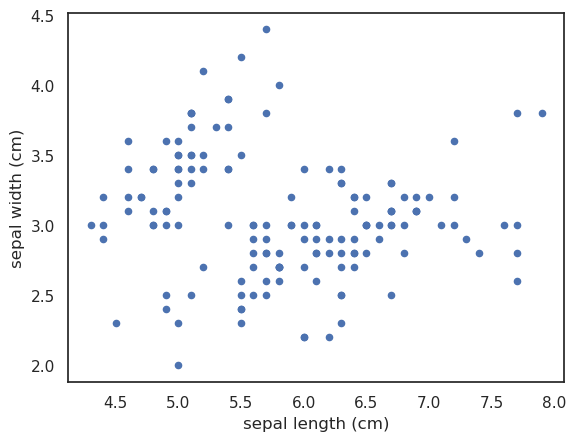

In [12]:
df.plot(kind="scatter", x="sepal length (cm)", y="sepal width (cm)")

This code uses Seaborn library to create a joint plot of two variables in a Pandas DataFrame. The x and y parameters specify the names of the columns in the DataFrame that we want to plot on the x and y axes, respectively. The data parameter specifies the name of the DataFrame containing the data to be plotted, and size specifies the size of the resulting plot. The joint plot displays a scatter plot of the relationship between the two variables, along with the distributions of each variable along the x and y axes using a histogram. This can help identify patterns or relationships between variables in the data.

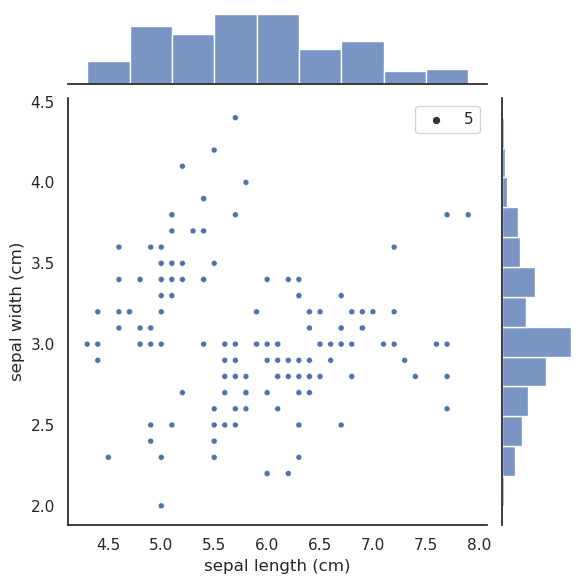

In [13]:
sns.jointplot(x="sepal length (cm)", y="sepal width (cm)", data=df, size=5)

<AxesSubplot:xlabel='target', ylabel='petal length (cm)'>

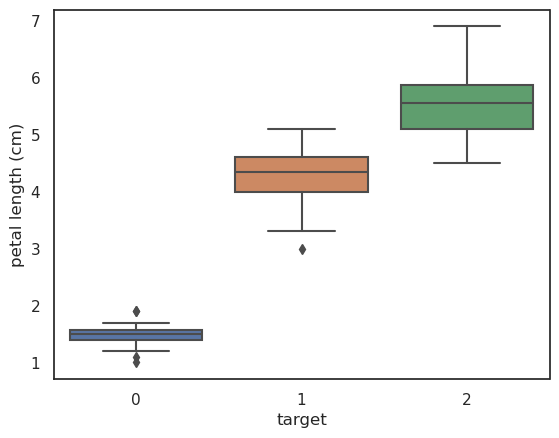

In [14]:
sns.boxplot(x="target", y="petal length (cm)", data=df)

This code creates a box plot using Seaborn library to visualize the distribution of a numerical variable (petal length (cm)) for different levels of a categorical variable (target). The resulting plot shows a box for each level of the categorical variable, with whiskers indicating the range of the data and outliers shown as individual points.

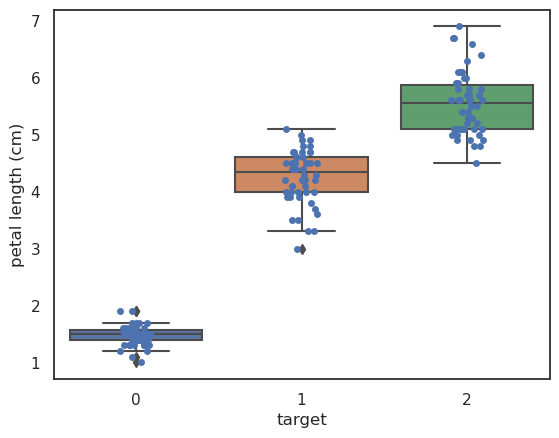

In [15]:
cx = sns.boxplot(x="target", y="petal length (cm)", data= df )
cx = sns.stripplot(x="target", y="petal length (cm)", data=df, jitter=True, edgecolor="gray")

This code creates a combined box plot and strip plot using Seaborn library to visualize the distribution of a numerical variable (petal length (cm)) for different levels of a categorical variable (target).

The first line sns.boxplot() creates a box plot, where x and y specify the names of the columns in the DataFrame df that we want to plot on the x and y axes, respectively.

The second line sns.stripplot() creates a strip plot, where x and y also specify the names of the columns in the DataFrame df that we want to plot on the x and y axes, respectively. jitter=True adds a small amount of random noise to the data points to better visualize overlapping points. edgecolor="gray" sets the color of the marker edge to gray.

Together, these two plots provide a more detailed view of the distribution of the data, showing the individual data points as well as the overall distribution with the box plot.

<AxesSubplot:xlabel='target', ylabel='petal length (cm)'>

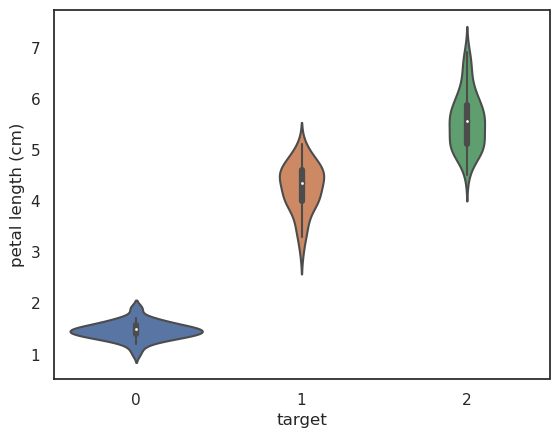

In [16]:
sns.violinplot(x="target", y="petal length (cm)", data=df, size=6)

A violin plot simplifies and combines the benefits of the box plot and kernel density plot. In a violin plot, denser regions of the data are represented by a fatter section, while sparser regions are represented by a thinner section.

# Justification for which dataset, KNN classifier cannot perform as we expected and why:


The k-nearest neighbors (KNN) algorithm is a simple and effective method for classification 
and regression tasks. However, like any algorithm, it has its limitations. Some of the main 
limitations of KNN are:
1. Computationally expensive: As the size of the dataset grows, the KNN algorithm becomes 
computationally expensive. This is because the algorithm needs to calculate the distances 
between the query instance and all the training instances for each prediction.
2. Sensitivity to irrelevant features: KNN considers all the features of the instances, even if 
some of them are irrelevant for the prediction. This can lead to a decrease in the accuracy of 
the algorithm.
3. Choosing the optimal value of k: The performance of KNN is highly dependent on the value 
of k (the number of neighbors to consider). Choosing an optimal value of k is not always 
straightforward and can require experimentation.
4. Imbalanced datasets: KNN is sensitive to imbalanced datasets, where the number of 
instances of one class is much larger than the other. In such cases, the majority class may 
dominate the prediction.
5. Outliers: KNN is sensitive to outliers, which are data points that are significantly different 
from other data points. Outliers can have a significant impact on the distances between the 
query instance and its neighbors and can lead to inaccurate predictions.
6. Noisy data: KNN is sensitive to noisy data, which are data points that contain errors or 
inconsistencies. Noisy data can affect the distances between the query instance and its 
neighbors and can lead to inaccurate predictions.
Overall, KNN is a simple and intuitive algorithm that can work well for many classification 
and regression tasks. However, it is important to be aware of its limitations and to use it in 
situations where it is appropriate.


# Limitations of KNN:



The k-nearest neighbors (KNN) algorithm is a simple and effective method for classification 
and regression tasks. However, like any algorithm, it has its limitations. Some of the main 
limitations of KNN are:
1. Computationally expensive: As the size of the dataset grows, the KNN algorithm becomes 
computationally expensive. This is because the algorithm needs to calculate the distances 
between the query instance and all the training instances for each prediction.
2. Sensitivity to irrelevant features: KNN considers all the features of the instances, even if 
some of them are irrelevant for the prediction. This can lead to a decrease in the accuracy of 
the algorithm.
3. Choosing the optimal value of k: The performance of KNN is highly dependent on the value 
of k (the number of neighbors to consider). Choosing an optimal value of k is not always 
straightforward and can require experimentation.
4. Imbalanced datasets: KNN is sensitive to imbalanced datasets, where the number of 
instances of one class is much larger than the other. In such cases, the majority class may 
dominate the prediction.
5. Outliers: KNN is sensitive to outliers, which are data points that are significantly different 
from other data points. Outliers can have a significant impact on the distances between the 
query instance and its neighbors and can lead to inaccurate predictions.
6. Noisy data: KNN is sensitive to noisy data, which are data points that contain errors or 
inconsistencies. Noisy data can affect the distances between the query instance and its 
neighbors and can lead to inaccurate predictions.
Overall, KNN is a simple and intuitive algorithm that can work well for many classification 
and regression tasks. However, it is important to be aware of its limitations and to use it in 
situations where it is appropriate.

# Conclusions

One way to optimize the performance of a KNN classifier is by tuning the hyperparameters. 
One such hyperparameter is the weighting scheme used to calculate the contribution of each 
of the k closest points to the prediction. While this parameter is typically ignored in the 
implementation of a basic KNN classifier, it can significantly impact the efficiency and 
accuracy of the algorithm.

Although the KNN classifier implemented here may be less efficient than a library function, 
it still serves its intended purpose. By adjusting the weighting scheme and other 
hyperparameters, it is possible to further improve the performance of the algorithm and 
achieve more accurate predictions

# **This is a work in progress. More to come. Stay tuned**

# Please give this notebook an **upvote** if it helps you to understand KNN.